In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import sys
import pandas as pd

In [3]:
df = pd.read_csv("../datasets/bitcoin/btc_usd.csv", 
                parse_dates=["Date"],
                index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-04,BTC,324.467934,323.826186,333.539527,323.106623
2014-11-05,BTC,328.644408,324.424164,330.671610,320.902900
2014-11-06,BTC,337.921358,328.653046,342.384170,328.597125
2014-11-07,BTC,348.992860,337.921358,352.585895,336.236830
2014-11-08,BTC,341.459753,348.992860,351.651854,340.196145


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2643 entries, 2014-11-04 to 2022-01-28
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2643 non-null   object 
 1   Closing Price (USD)  2643 non-null   float64
 2   24h Open (USD)       2643 non-null   float64
 3   24h High (USD)       2643 non-null   float64
 4   24h Low (USD)        2643 non-null   float64
dtypes: float64(4), object(1)
memory usage: 123.9+ KB


In [5]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2022-01-24,BTC,36285.926944,35070.896987,36514.853501,34630.980000
2022-01-25,BTC,36699.614179,36285.633626,37500.000000,32983.590000
2022-01-26,BTC,36971.571269,36699.999462,37544.200000,35730.449773
2022-01-27,BTC,36827.674589,36970.783896,38920.712256,36285.050740
2022-01-28,BTC,37197.821249,36828.097867,37242.500000,35550.000000


In [6]:
len(df)

2643

In [7]:
7*365

2555

In [15]:
df.columns

Index(['Currency', 'Closing Price (USD)', '24h Open (USD)', '24h High (USD)',
       '24h Low (USD)'],
      dtype='object')

In [16]:
df.index

DatetimeIndex(['2014-11-04', '2014-11-05', '2014-11-06', '2014-11-07',
               '2014-11-08', '2014-11-09', '2014-11-10', '2014-11-11',
               '2014-11-12', '2014-11-13',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='Date', length=2643, freq=None)

In [24]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "price"})
bitcoin_prices.head()

,price
Date,
2014-11-04,324.467934
2014-11-05,328.644408
2014-11-06,337.921358
2014-11-07,348.992860
2014-11-08,341.459753


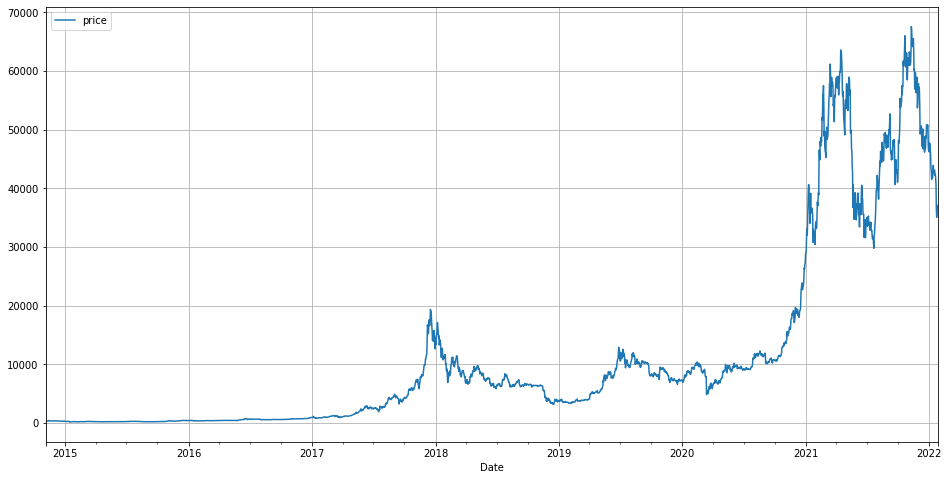

In [34]:
bitcoin_prices.plot(y="price", use_index=True,figsize=(16, 8))
plt.grid()
plt.show()

In [37]:
timestamps = bitcoin_prices.index.to_numpy()
timestamps

In [39]:
prices = bitcoin_prices["price"].to_numpy()
prices

array([  324.467934,   328.644408,   337.921358, ..., 36971.571269,
       36827.674589, 37197.821249])

In [68]:
split_size = int(0.80*len(prices))

In [69]:
X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test  = timestamps[split_size:], prices[split_size:]
print( len(X_train),len(y_train) ,len(X_test), len(y_test))

2114 2114 529 529


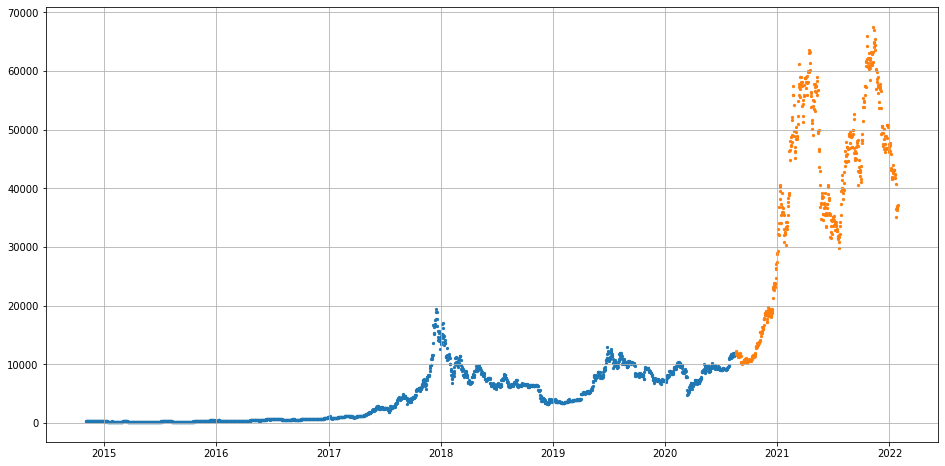

In [70]:
plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train, s=5, label="TrainData")
plt.scatter(X_test, y_test, s=5, label="TestData")
plt.grid()
plt.show();

In [71]:
naive_forcast = y_test[:-1]
print(len(naive_forcast), len(y_test))

528 529


In [72]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

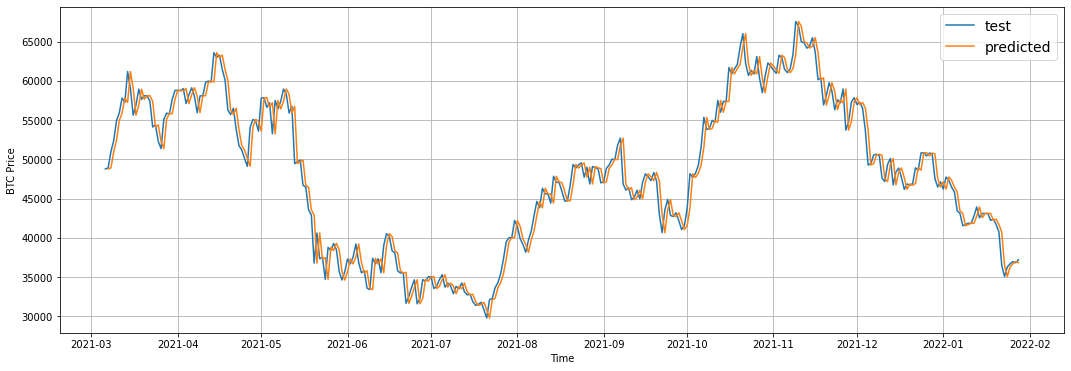

In [73]:
plt.figure(figsize=(18,6))
# plot_time_series(X_train, y_train, label="train")
plot_time_series(X_test, y_test,format="-",start=200, label="test")
plot_time_series(X_test[1:], naive_forcast,format="-",start=200, label="predicted")

In [74]:
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

    return mae / mae_naive_no_season

In [75]:
mean_absolute_scaled_error(y_test[1:], naive_forcast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9986797708151375>

In [76]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [77]:
evaluate_preds(y_test[1:], naive_forcast)

{'mae': 1126.9683,
 'mse': 2708268.8,
 'rmse': 1645.6819,
 'mape': 2.8300264,
 'mase': 0.99867964}

In [78]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=10123.3>,
 <tf.Tensor: shape=(), dtype=float64, numpy=67553.94893>)

In [91]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [92]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [93]:
a = list(range(20))

In [94]:
a[ :-1], a[ -1:]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [19])

In [95]:
get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [96]:
def make_windows(x, window_size=7, horizon=1):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size.
    """
    # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    # print(f"Window step:\n {window_step}")

    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
    # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

    # 3. Index on the target array (time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

In [100]:
full_windows, full_labels = make_windows(prices)
full_windows[:5], full_labels[:5]

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640],
       [2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641],
       [2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642]]), (2636, 8))


(array([[324.467934, 328.644408, 337.921358, 348.99286 , 341.459753,
         344.745289, 357.239982],
        [328.644408, 337.921358, 348.99286 , 341.459753, 344.745289,
         357.239982, 371.116917],
        [337.921358, 348.99286 , 341.459753, 344.745289, 357.239982,
         371.116917, 366.664633],
        [348.99286 , 341.459753, 344.745289, 357.239982, 371.116917,
         366.664633, 428.882925],
        [341.459753, 344.745289, 357.239982, 371.116917, 366.664633,
         428.882925, 418.944218]]),
 array([[371.116917],
        [366.664633],
        [428.882925],
        [418.944218],
        [399.688315]]))

In [101]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
      Splits matching pairs of windows and labels into train and test splits.
    """
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [102]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [103]:
def create_tensorboard_callback(experiment_name, model_name):
    """
    Create an tensorboard callback.
    """
    return tf.keras.callbacks.TensorBoard(log_dir=os.path.join("model_logs", experiment_name, model_name))

In [105]:
def create_model_checkpoint_callback(experiment_name, model_name):
    """
     Create an Model Checkpoint callback
    """
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join("model_checkpoints", experiment_name, model_name+".ckpt"),
                                              save_weights_only=True, 
                                              save_best_only=True)

Model: "dense_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7)]               0         
                                                                 
 dense_layer_a (Dense)       (None, 128)               1024      
                                                                 
 ouput_layer (Dense)         (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


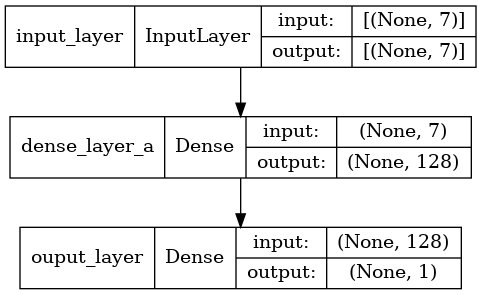

In [109]:
input_layer = tf.keras.layers.Input(shape=(7,), dtype=tf.float32, name="input_layer")
dense_layer_a = tf.keras.layers.Dense(units=128,activation="relu",name="dense_layer_a")(input_layer)
output_layer = tf.keras.layers.Dense(units=1, activation="linear", name="ouput_layer")(dense_layer_a)
model_1 = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="dense_model_1")
model_1.summary()
tf.keras.utils.plot_model(model=model_1, show_shapes=True)

In [112]:
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"]
                )

In [113]:
model_1.fit(x=train_windows, y=train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint_callback("timeseries", model_1.name),
                      create_tensorboard_callback("timeseries", model_1.name)]
           )

Epoch 1/100
17/17 [==============================] - 1s 17ms/step - loss: 1425.3370 - mae: 1425.3370 - mse: 5786563.5000 - val_loss: 6751.8301 - val_mae: 6751.8301 - val_mse: 63602772.0000
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 467.9729 - mae: 467.9729 - mse: 615832.5625 - val_loss: 2050.2976 - val_mae: 2050.2976 - val_mse: 7663745.0000
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 271.8658 - mae: 271.8658 - mse: 272386.1875 - val_loss: 2044.8613 - val_mae: 2044.8613 - val_mse: 7588442.5000
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 235.3682 - mae: 235.3682 - mse: 224794.2969 - val_loss: 1957.2189 - val_mae: 1957.2189 - val_mse: 7121844.0000
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 232.6241 - mae: 232.6241 - mse: 217682.4688 - val_loss: 1901.6627 - val_mae: 1901.6627 - val_mse: 6811573.5000
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 22

17/17 [==============================] - 0s 8ms/step - loss: 146.6403 - mae: 146.6403 - mse: 96023.7656 - val_loss: 1251.7472 - val_mae: 1251.7472 - val_mse: 3096836.0000
Epoch 46/100
17/17 [==============================] - 0s 8ms/step - loss: 141.2690 - mae: 141.2690 - mse: 91611.2969 - val_loss: 1244.7860 - val_mae: 1244.7860 - val_mse: 3183630.0000
Epoch 47/100
17/17 [==============================] - 0s 9ms/step - loss: 145.0185 - mae: 145.0185 - mse: 93810.2031 - val_loss: 1181.7152 - val_mae: 1181.7152 - val_mse: 2905324.0000
Epoch 48/100
17/17 [==============================] - 0s 8ms/step - loss: 145.3497 - mae: 145.3497 - mse: 91310.4297 - val_loss: 1180.3844 - val_mae: 1180.3844 - val_mse: 2913094.5000
Epoch 49/100
17/17 [==============================] - 0s 8ms/step - loss: 142.5220 - mae: 142.5220 - mse: 91820.5547 - val_loss: 1175.4819 - val_mae: 1175.4819 - val_mse: 2887444.0000
Epoch 50/100
17/17 [==============================] - 0s 7ms/step - loss: 144.7624 - mae: 144

17/17 [==============================] - 0s 8ms/step - loss: 138.8913 - mae: 138.8913 - mse: 86735.6016 - val_loss: 1207.1343 - val_mae: 1207.1343 - val_mse: 2928412.2500
Epoch 90/100
17/17 [==============================] - 0s 8ms/step - loss: 138.8625 - mae: 138.8625 - mse: 84892.3984 - val_loss: 1164.5547 - val_mae: 1164.5547 - val_mse: 2858873.7500
Epoch 91/100
17/17 [==============================] - 0s 7ms/step - loss: 132.8425 - mae: 132.8425 - mse: 82942.2266 - val_loss: 1193.6958 - val_mae: 1193.6958 - val_mse: 2886540.7500
Epoch 92/100
17/17 [==============================] - 0s 8ms/step - loss: 137.1959 - mae: 137.1959 - mse: 83554.8828 - val_loss: 1217.9465 - val_mae: 1217.9465 - val_mse: 3042594.7500
Epoch 93/100
17/17 [==============================] - 0s 8ms/step - loss: 135.5358 - mae: 135.5358 - mse: 84065.5859 - val_loss: 1147.2830 - val_mae: 1147.2830 - val_mse: 2763602.2500
Epoch 94/100
17/17 [==============================] - 0s 8ms/step - loss: 135.8605 - mae: 135

In [114]:
model_1.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 4ms/step - loss: 1127.2084 - mae: 1127.2084 - mse: 2728394.0000


[1127.2083740234375, 1127.2083740234375, 2728394.0]